# Basic Geopandas

Python library for working with spatial data. Built on top of pandas.

Latest version depends on:
- pandas - tabular data and timeseries
- matplotlib - visualization
- shapely - analysis geometric data
- fiona - geometric and GIS data handling

Info about Geopandas concepts can be found in its [website](https://geopandas.org/en/stable/getting_started/introduction.html)

In [1]:

import pandas as pd
import geopandas as gpd

/opt/miniconda3/envs/geoenv/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/s3/hn_b7b592ds9ws3gm7g38r3n4f2n9c/T/ipykernel_10170/3066300153.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should

## Creating a Geopandas dataframe from a pandas dataframe with coordinates

In [2]:
df = pd.read_csv("../../data/raw/Seat.csv")
df.shape

(6514, 20)

In [3]:
df.head()

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,SEAT_MATERIAL,NO_OF_PLACES,ARMRESTS,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,ALUMINIUM,4.0,N,Y,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739}
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,STONE,1.0,N,N,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15}
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,TIMBER AND CONCRETE,NaN,Y,N,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314}
3,153.451864,-28.090265,4,6000109171,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,ALUMINIUM AND STEEL,4.0,N,N,PAINTED,R-C-CONNORSTREETXXX,NaN,SEAT,6930,{DFA235DD-34D3-4788-B2A4-6708FC8539E3}
4,153.398992,-28.069485,5,6000104550,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,ALUMINIUM AND STEEL,4.0,Y,Y,POWDERCOATED,R-K-KILLARNEYAVENUE,NaN,SEAT,59286,{BA6143A1-2A5F-4117-A60D-9D51736B63C0}


In [4]:
sdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y))
sdf.shape

(6514, 21)

In [5]:
sdf.head()

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,...,NO_OF_PLACES,ARMRESTS,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID,geometry
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,4.0,N,Y,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739},POINT (153.40740 -27.94935)
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,...,1.0,N,N,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15},POINT (153.41433 -27.96862)
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,...,NaN,Y,N,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314},POINT (153.43046 -28.00218)
3,153.451864,-28.090265,4,6000109171,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,4.0,N,N,PAINTED,R-C-CONNORSTREETXXX,NaN,SEAT,6930,{DFA235DD-34D3-4788-B2A4-6708FC8539E3},POINT (153.45186 -28.09027)
4,153.398992,-28.069485,5,6000104550,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,4.0,Y,Y,POWDERCOATED,R-K-KILLARNEYAVENUE,NaN,SEAT,59286,{BA6143A1-2A5F-4117-A60D-9D51736B63C0},POINT (153.39899 -28.06949)


In [6]:
sdf.geometry

0       POINT (153.40740 -27.94935)
1       POINT (153.41433 -27.96862)
2       POINT (153.43046 -28.00218)
3       POINT (153.45186 -28.09027)
4       POINT (153.39899 -28.06949)
                   ...             
6509    POINT (153.41545 -28.02607)
6510    POINT (153.41532 -28.02613)
6511    POINT (153.41718 -27.97245)
6512    POINT (153.43451 -28.04807)
6513    POINT (153.43452 -28.04811)
Name: geometry, Length: 6514, dtype: geometry

In [7]:
sdf.crs

In [8]:
sdf = sdf.set_crs("EPSG:4326")
sdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

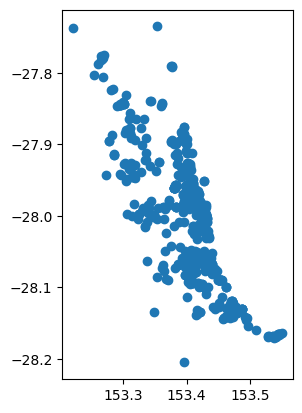

In [9]:
sdf[0:500].plot()

## Creating a Geopandas dataframe from a spatial file

In [10]:
parks = "../../data/raw/FL_-_Parks/FL_PARKS.shp"

In [11]:
sdf_parks = gpd.read_file(parks)
sdf_parks.shape

(2281, 11)

In [12]:
sdf_parks.head()

,OBJECTID,CLASS,GIS_DESCRI,GIS_ACQUIS,GIS_OWNER,AREA_SQM,CREATED_DA,LAST_EDITE,SHAPE_Leng,SHAPE_Area,geometry
0,1,PARK,NEAL SHANNON PARK,UN,GCCC,2086.760,2018-05-18,2022-08-21,0.003041,1.915921e-07,"POLYGON ((153.42760 -28.00436, 153.42765 -28.0..."
1,2,PARK,HEIGHTS PARK,UN,GCCC,485.788,2018-05-18,2018-05-18,0.001356,4.463373e-08,"POLYGON ((153.38562 -28.08349, 153.38562 -28.0..."
2,3,PARK,WILLIAM GUISE FOXWELL PARK,UN,TBA,40308.000,2018-05-18,2018-05-18,0.008282,3.687446e-06,"POLYGON ((153.33980 -27.86118, 153.33944 -27.8..."
3,4,PARK,SALVADO RESERVE,UN,TBA,74757.000,2018-05-18,2018-05-18,0.019863,6.843422e-06,"POLYGON ((153.31333 -27.93529, 153.31353 -27.9..."
4,5,PARK,ELANORA CONSERVATION AREA,UN,TBA,130885.000,2018-05-18,2018-05-18,0.020958,1.200570e-05,"POLYGON ((153.44279 -28.14490, 153.44294 -28.1..."


In [13]:
sdf_parks.geometry

0       POLYGON ((153.42760 -28.00436, 153.42765 -28.0...
1       POLYGON ((153.38562 -28.08349, 153.38562 -28.0...
2       POLYGON ((153.33980 -27.86118, 153.33944 -27.8...
3       POLYGON ((153.31333 -27.93529, 153.31353 -27.9...
4       POLYGON ((153.44279 -28.14490, 153.44294 -28.1...
                              ...                        
2276    POLYGON ((153.29276 -27.91552, 153.29266 -27.9...
2277    POLYGON ((153.40963 -28.08453, 153.40989 -28.0...
2278    POLYGON ((153.39141 -28.08875, 153.39159 -28.0...
2279    POLYGON ((153.39205 -28.08645, 153.39229 -28.0...
2280    POLYGON ((153.39170 -28.08613, 153.39167 -28.0...
Name: geometry, Length: 2281, dtype: geometry

In [14]:
sdf_parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

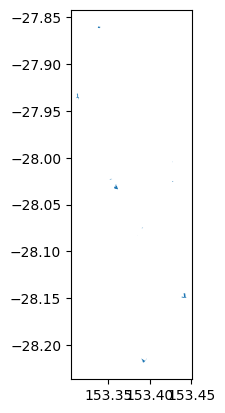

In [15]:
sdf_parks[:10].plot()

## Exploring spatial data with Geopandas

In [16]:
sdf_parks[:10].area

/var/folders/s3/hn_b7b592ds9ws3gm7g38r3n4f2n9c/T/ipykernel_10170/3194217842.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sdf_parks[:10].area


0    1.915921e-07
1    4.463373e-08
2    3.687446e-06
3    6.843422e-06
4    1.200570e-05
5    1.239291e-05
6    1.003860e-06
7    5.489137e-07
8    8.249691e-06
9    7.195247e-07
dtype: float64

In [17]:
sdf_parks[:10].centroid

/var/folders/s3/hn_b7b592ds9ws3gm7g38r3n4f2n9c/T/ipykernel_10170/341345290.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sdf_parks[:10].centroid


0    POINT (153.42786 -28.00442)
1    POINT (153.38534 -28.08331)
2    POINT (153.33852 -27.86079)
3    POINT (153.31273 -27.93450)
4    POINT (153.44173 -28.14764)
5    POINT (153.35913 -28.03174)
6    POINT (153.35272 -28.02317)
7    POINT (153.39091 -28.07494)
8    POINT (153.39238 -28.21670)
9    POINT (153.42769 -28.02535)
dtype: geometry

<Axes: >

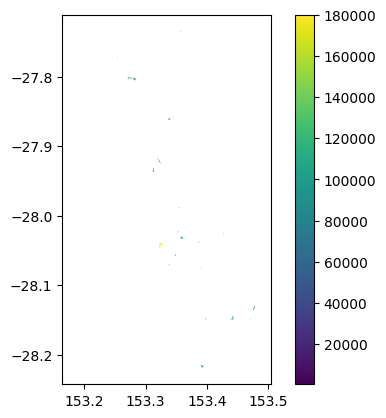

In [18]:
sdf_parks[:30].plot("AREA_SQM", legend=True)

In [19]:
sdf_parks[:50].explore("AREA_SQM", legend=False)

In [20]:
sdf_parks.columns

Index(['OBJECTID', 'CLASS', 'GIS_DESCRI', 'GIS_ACQUIS', 'GIS_OWNER',
       'AREA_SQM', 'CREATED_DA', 'LAST_EDITE', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [21]:
sdf_parks.nlargest(4, "AREA_SQM")

,OBJECTID,CLASS,GIS_DESCRI,GIS_ACQUIS,GIS_OWNER,AREA_SQM,CREATED_DA,LAST_EDITE,SHAPE_Leng,SHAPE_Area,geometry
1653,1654,PARK,COOMBABAH LAKELANDS CONSERVATION AREA,UN,GCCC,9735193.887,2018-05-18,2023-06-06,0.398385,0.000893,"MULTIPOLYGON (((153.35996 -27.89306, 153.35999..."
2232,2233,PARK,LOWER BEECHMONT CONSERVATION AREA,UN,TBA,7725700.000,2018-05-18,2022-05-09,0.206547,0.000709,"MULTIPOLYGON (((153.26679 -28.00804, 153.26679..."
1890,1891,PARK,BONOGIN CONSERVATION AREA,UN,TBA,7371140.000,2019-03-05,2020-04-16,0.436492,0.000678,"MULTIPOLYGON (((153.35121 -28.13365, 153.35769..."
368,369,PARK,PIMPAMA RIVER CONSERVATION AREA,UN,TBA,6553477.000,2018-05-18,2021-10-15,0.254873,0.000601,"MULTIPOLYGON (((153.36478 -27.79847, 153.36494..."


In [22]:
sdf_parks.nlargest(10, "AREA_SQM").explore("AREA_SQM", legend=False)

## Spatial operations

In [23]:
sdf.head(3)

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,...,NO_OF_PLACES,ARMRESTS,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID,geometry
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,4.0,N,Y,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739},POINT (153.40740 -27.94935)
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,...,1.0,N,N,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15},POINT (153.41433 -27.96862)
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,...,NaN,Y,N,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314},POINT (153.43046 -28.00218)


In [24]:
sdf_parks.head(3)

,OBJECTID,CLASS,GIS_DESCRI,GIS_ACQUIS,GIS_OWNER,AREA_SQM,CREATED_DA,LAST_EDITE,SHAPE_Leng,SHAPE_Area,geometry
0,1,PARK,NEAL SHANNON PARK,UN,GCCC,2086.760,2018-05-18,2022-08-21,0.003041,1.915921e-07,"POLYGON ((153.42760 -28.00436, 153.42765 -28.0..."
1,2,PARK,HEIGHTS PARK,UN,GCCC,485.788,2018-05-18,2018-05-18,0.001356,4.463373e-08,"POLYGON ((153.38562 -28.08349, 153.38562 -28.0..."
2,3,PARK,WILLIAM GUISE FOXWELL PARK,UN,TBA,40308.000,2018-05-18,2018-05-18,0.008282,3.687446e-06,"POLYGON ((153.33980 -27.86118, 153.33944 -27.8..."


In [25]:
sdf.shape, sdf_parks.shape

((6514, 21), (2281, 11))

In [26]:
sdf_seats = sdf[:1000]
sdf_seats.shape

(1000, 21)

In [27]:
sdf_parks.columns

Index(['OBJECTID', 'CLASS', 'GIS_DESCRI', 'GIS_ACQUIS', 'GIS_OWNER',
       'AREA_SQM', 'CREATED_DA', 'LAST_EDITE', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [28]:
sdf_parks[["GIS_DESCRI", "geometry"]].head()

,GIS_DESCRI,geometry
0,NEAL SHANNON PARK,"POLYGON ((153.42760 -28.00436, 153.42765 -28.0..."
1,HEIGHTS PARK,"POLYGON ((153.38562 -28.08349, 153.38562 -28.0..."
2,WILLIAM GUISE FOXWELL PARK,"POLYGON ((153.33980 -27.86118, 153.33944 -27.8..."
3,SALVADO RESERVE,"POLYGON ((153.31333 -27.93529, 153.31353 -27.9..."
4,ELANORA CONSERVATION AREA,"POLYGON ((153.44279 -28.14490, 153.44294 -28.1..."


#### Spatial Join

In [29]:
sdf_joined = sdf_seats.sjoin(sdf_parks[["GIS_DESCRI", "geometry"]], how="left")
sdf_joined.shape

(1000, 23)

In [30]:
sdf_joined

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,...,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID,geometry,index_right,GIS_DESCRI
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,Y,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739},POINT (153.40740 -27.94935),NaN,NaN
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,...,N,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15},POINT (153.41433 -27.96862),NaN,NaN
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,...,N,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314},POINT (153.43046 -28.00218),NaN,NaN
3,153.451864,-28.090265,4,6000109171,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,N,PAINTED,R-C-CONNORSTREETXXX,NaN,SEAT,6930,{DFA235DD-34D3-4788-B2A4-6708FC8539E3},POINT (153.45186 -28.09027),NaN,NaN
4,153.398992,-28.069485,5,6000104550,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,Y,POWDERCOATED,R-K-KILLARNEYAVENUE,NaN,SEAT,59286,{BA6143A1-2A5F-4117-A60D-9D51736B63C0},POINT (153.39899 -28.06949),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153.457004,-28.112354,996,6000037360,SEAT,INSV,SEAT,INST,BENCH,ALUMINIUM STYLE BENCH,...,N,POWDERCOATED,K-MALL01,NaN,SEAT BENCH,SEAT1382,{4AAC9F06-9105-4BA6-91AF-0FC35028058E},POINT (153.45700 -28.11235),1441.0,MALLAWA SPORTS COMPLEX
996,153.363396,-28.082835,997,6000043545,SEAT,INSV,SEAT,INST,BENCH,ALUMINIUM STYLE BENCH,...,Y,POWDERCOATED,K-FIRTHP,NaN,SEAT BENCH,SEAT1790,{7B898748-04C4-474E-AF85-9F0E110A5682},POINT (153.36340 -28.08284),2203.0,FIRTH PARK
997,153.431540,-28.003440,998,6000096049,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,...,Y,STAINED,Y-BEACH-SURFERS,NaN,SEAT.,SEAT14408,{BBA3F396-99AB-4763-9134-9A360DDC4244},POINT (153.43154 -28.00344),250.0,SURFERS ESPLANADE PARK URBAN PRECINCT
998,153.441433,-28.086702,999,6000049742,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE SEAT,...,Y,PLAIN,K-LAKE05,NaN,SEAT BENCH WITH BACK,SEAT3081,{B42D4DCF-740E-4A2F-8657-52AF7633AAD5},POINT (153.44143 -28.08670),2050.0,LAKE VIEW PARK


In [31]:
sdf_nearest = sdf_seats.sjoin_nearest(sdf_parks[["GIS_DESCRI", "geometry"]], how="left", distance_col="Distance_nearest_park")
sdf_nearest.shape

/opt/miniconda3/envs/geoenv/lib/python3.11/site-packages/geopandas/array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


(1000, 24)

In [32]:
sdf_nearest.head()

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,...,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID,geometry,index_right,GIS_DESCRI,Distance_nearest_park
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739},POINT (153.40740 -27.94935),2134,LEN FOX PARK,0.002148
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,...,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15},POINT (153.41433 -27.96862),1282,WOODROFFE PARK,0.002142
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,...,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314},POINT (153.43046 -28.00218),250,SURFERS ESPLANADE PARK URBAN PRECINCT,0.000688
3,153.451864,-28.090265,4,6000109171,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,PAINTED,R-C-CONNORSTREETXXX,NaN,SEAT,6930,{DFA235DD-34D3-4788-B2A4-6708FC8539E3},POINT (153.45186 -28.09027),945,MEMORIAL PARK,0.000687
4,153.398992,-28.069485,5,6000104550,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,POWDERCOATED,R-K-KILLARNEYAVENUE,NaN,SEAT,59286,{BA6143A1-2A5F-4117-A60D-9D51736B63C0},POINT (153.39899 -28.06949),630,TROON COURT RESERVE,0.001459


In [33]:
sdf_nearest.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
sdf_seats = sdf_seats.to_crs("+proj=utm +zone=50 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs +type=crs")
sdf_seats.crs

<Bound CRS: +proj=utm +zone=50 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [35]:
sdf_parks = sdf_parks.to_crs("+proj=utm +zone=50 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs +type=crs")
sdf_parks.crs

<Bound CRS: +proj=utm +zone=50 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [36]:
sdf_nearest = sdf_seats.sjoin_nearest(sdf_parks[["GIS_DESCRI", "geometry"]], how="left", distance_col="Distance_nearest_park")
sdf_nearest.shape

(1000, 24)

In [37]:
sdf_nearest.head()

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,...,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID,geometry,index_right,GIS_DESCRI,Distance_nearest_park
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739},POINT (4215772.073 6301201.012),2134,LEN FOX PARK,249.254571
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,...,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15},POINT (4215707.121 6298568.639),1282,WOODROFFE PARK,277.716431
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,...,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314},POINT (4216036.882 6293828.879),250,SURFERS ESPLANADE PARK URBAN PRECINCT,79.600984
3,153.451864,-28.090265,4,6000109171,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,PAINTED,R-C-CONNORSTREETXXX,NaN,SEAT,6930,{DFA235DD-34D3-4788-B2A4-6708FC8539E3},POINT (4214603.979 6282186.373),945,MEMORIAL PARK,89.144634
4,153.398992,-28.069485,5,6000104550,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,...,POWDERCOATED,R-K-KILLARNEYAVENUE,NaN,SEAT,59286,{BA6143A1-2A5F-4117-A60D-9D51736B63C0},POINT (4209728.837 6286746.846),630,TROON COURT RESERVE,176.805120
